<a href="https://colab.research.google.com/github/yasaswini-devi-2004/Machine_Learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

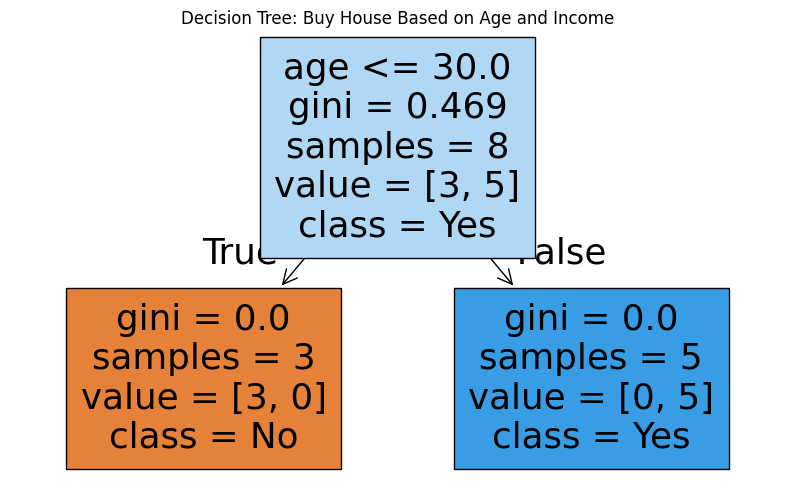

In [1]:
# Exercise 1: Classification Tree – Buy a House Based on Age and Income

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample dataset
data1 = {
    'age': [25, 32, 45, 22, 35, 28, 40, 50],
    'income': [40000, 60000, 80000, 30000, 70000, 45000, 90000, 100000],
    'bought_house': [0, 1, 1, 0, 1, 0, 1, 1]  # 0 = No, 1 = Yes
}

df1 = pd.DataFrame(data1)

# Features and target
X1 = df1[['age', 'income']]
y1 = df1['bought_house']

# Train a decision tree classifier
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(X1, y1)

# Plotting the tree
plt.figure(figsize=(10, 6))
plot_tree(clf1, feature_names=['age', 'income'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree: Buy House Based on Age and Income")
plt.show()


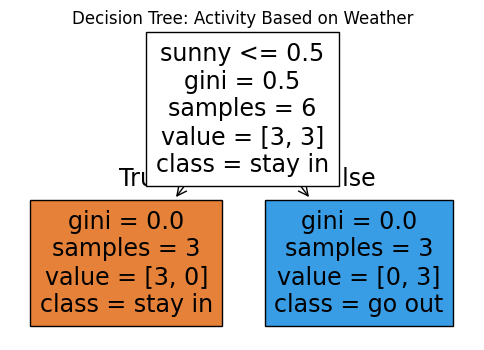

In [2]:
# Exercise 2: Classification – Go Out or Stay In Based on Weather

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample dataset
data2 = {
    'weather': ['sunny', 'sunny', 'rainy', 'rainy', 'sunny', 'rainy'],
    'activity': ['go out', 'go out', 'stay in', 'stay in', 'go out', 'stay in']
}

df2 = pd.DataFrame(data2)

# Convert categorical data (weather) to one-hot encoding
X2 = pd.get_dummies(df2['weather'])  # Creates columns 'rainy' and 'sunny'
y2 = df2['activity'].map({'stay in': 0, 'go out': 1})  # Encode target

# Train a decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X2, y2)

# Plotting the tree
plt.figure(figsize=(6, 4))
plot_tree(clf2, feature_names=X2.columns, class_names=['stay in', 'go out'], filled=True)
plt.title("Decision Tree: Activity Based on Weather")
plt.show()


   pregnant  glucose   bp  skin  insulin   bmi  pedigree  age  label
0         6      166  106    30      151  29.0     1.111   27      1
1         3      193  104    64      261  34.6     1.870   40      1
2         7      139   72    15      257  20.4     0.673   37      1
3         4      162   79    90       45  21.4     0.365   49      1
4         6       72  113    78       54  45.2     0.951   37      1
Accuracy: 75.00%


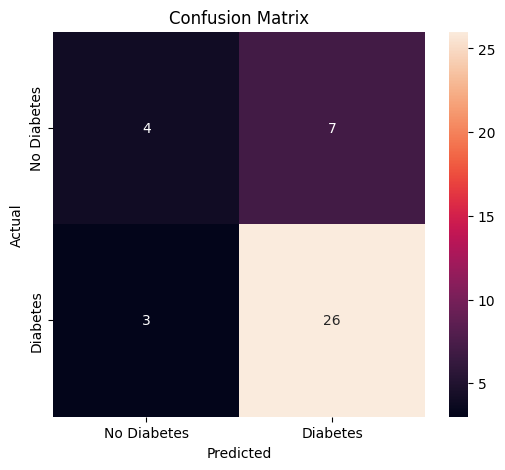

In [5]:
#example problem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 200

# Generate random data for each feature with reasonable ranges (based on typical diabetes dataset)
data = pd.DataFrame({
    'pregnant': np.random.randint(0, 10, size=n_samples),
    'glucose': np.random.randint(70, 200, size=n_samples),
    'bp': np.random.randint(40, 120, size=n_samples),
    'skin': np.random.randint(10, 100, size=n_samples),
    'insulin': np.random.randint(15, 300, size=n_samples),
    'bmi': np.round(np.random.uniform(15, 50, size=n_samples), 1),
    'pedigree': np.round(np.random.uniform(0.1, 2.5, size=n_samples), 3),
    'age': np.random.randint(20, 80, size=n_samples),
})

# Generate a random binary target with some correlation for label
# For simplicity, let’s say label=1 if glucose > 125 or bmi > 30 else 0 with some noise
data['label'] = ((data['glucose'] > 125) | (data['bmi'] > 30)).astype(int)

# Add noise by flipping some labels randomly
flip_idx = np.random.choice(n_samples, size=int(n_samples*0.1), replace=False)
data.loc[flip_idx, 'label'] = 1 - data.loc[flip_idx, 'label']

print(data.head())

# Split into features and target
X = data.drop('label', axis=1)
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
